In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder 
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# The Data Set:

The data set that I am analyzing is the Oceonographic data set provided by the California Cooperative Oceanographic Fisheries Investigations (https://www.kaggle.com/sohier/calcofi).
The data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic data. It includes data on temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite; among other metrics of interests to researchers.

In [2]:
df = pd.read_csv('bottle.csv')
df = pd.DataFrame(df)

# Exploratory Analysis:
After we have loaded the data into a data frame we can begin doing some exploratory data analysis to see such things as how many empty entries are there for each column. Or if our data frame contains entries that are object data types and not numerical data. The code below checks to see how many empty values there are in each column.


In [4]:
df.isna().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
T_degC                  10963
Salnty                  47354
O2ml_L                 168662
STheta                  52689
O2Sat                  203589
Oxy_µmol/Kg            203595
BtlNum                 746196
RecInd                      0
T_prec                  10963
T_qual                 841736
S_prec                  47354
S_qual                 789949
P_qual                 191108
O_qual                 680187
SThtaq                 799040
O2Satq                 647066
ChlorA                 639591
Chlqua                 225697
Phaeop                 639592
Phaqua                 225693
PO4uM                  451546
PO4q                   413077
SiO3uM                 510772
SiO3qu                 353997
NO2uM                  527287
                        ...  
MeanAs                 842213
MeanAp                 844406
MeanAq    

So we notice there are many columns in our data set that contain almost no entries in them compared to the rest of the data set. So we can begin by first dropping any columns that have objects in them and then any columns that have over 300,000 entries missing(this number is arbitrarily chosen). We can also drop columns that are will not be useful for our analysis such as columns that relate to any form of ID.

In [5]:
for i in df.columns:
    if(df[i].dtype=='object'):
        del df[i]
for i in df.columns:
    if(df[i].isna().sum()>=300000):
        del df[i]

df.isna().sum()

Cst_Cnt             0
Btl_Cnt             0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

In [6]:

#df[:1]

We have now reduced the columns in the data set from 74 columns to 28 columns. But there are still columns with missing values and now we must figure out what to do with the missing entries, we could either drop the rows with missing entries or fill the rows with the means of their respective columns. 

In [7]:
#fig, ax=plt.subplots(1,2, sharey=True)
#sns.distplot(df['Oxy_µmol/Kg'].dropna(), ax=ax[0])
#ax[0].set_title("DropNa")
#sns.distplot(df['Oxy_µmol/Kg'].fillna(df['Oxy_µmol/Kg'].mean()), ax=ax[1])
#ax[1].set_title("FillNa with mean")
#We can see from by comparing the graphs of the dropped Oxy_µmol/Kg that there is a peak in the central tendency of the data and thus for our analysis we will not drop empty values and instead will fill empty values with the mean of the columns instead.

In [8]:
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace=True)
df[:5]

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,3,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0
1,1,2,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,3,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8
2,1,3,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,7,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10
3,1,4,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,3,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19
4,1,5,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,7,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20


In [9]:
df = df.drop(['Cst_Cnt','Btl_Cnt'], axis=1)
#for i in df.columns:
#    print(i)

In [10]:
cat_columns = ["RecInd", "T_prec","S_prec","P_qual","Phaqua","Chlqua","NH3q","C14A1q","C14A2q"]

In [11]:
df_with_dummies = pd.get_dummies(df, prefix_sep="_",columns=cat_columns)


In [12]:

extra_columns = ['RecInd_4','RecInd_6','T_prec_2.0171483780302144','S_prec_2.716787215798236','P_qual_8.999995547342877','T_prec_2.0171483780302144','Phaqua_8.999843547100145','Chlqua_8.999848239737409','NH3q_8.947667880326463','C14A1q_8.999991751168093','C14A2q_8.999991751343059']
df_with_dummies = df_with_dummies.drop(axis=1,columns=extra_columns )

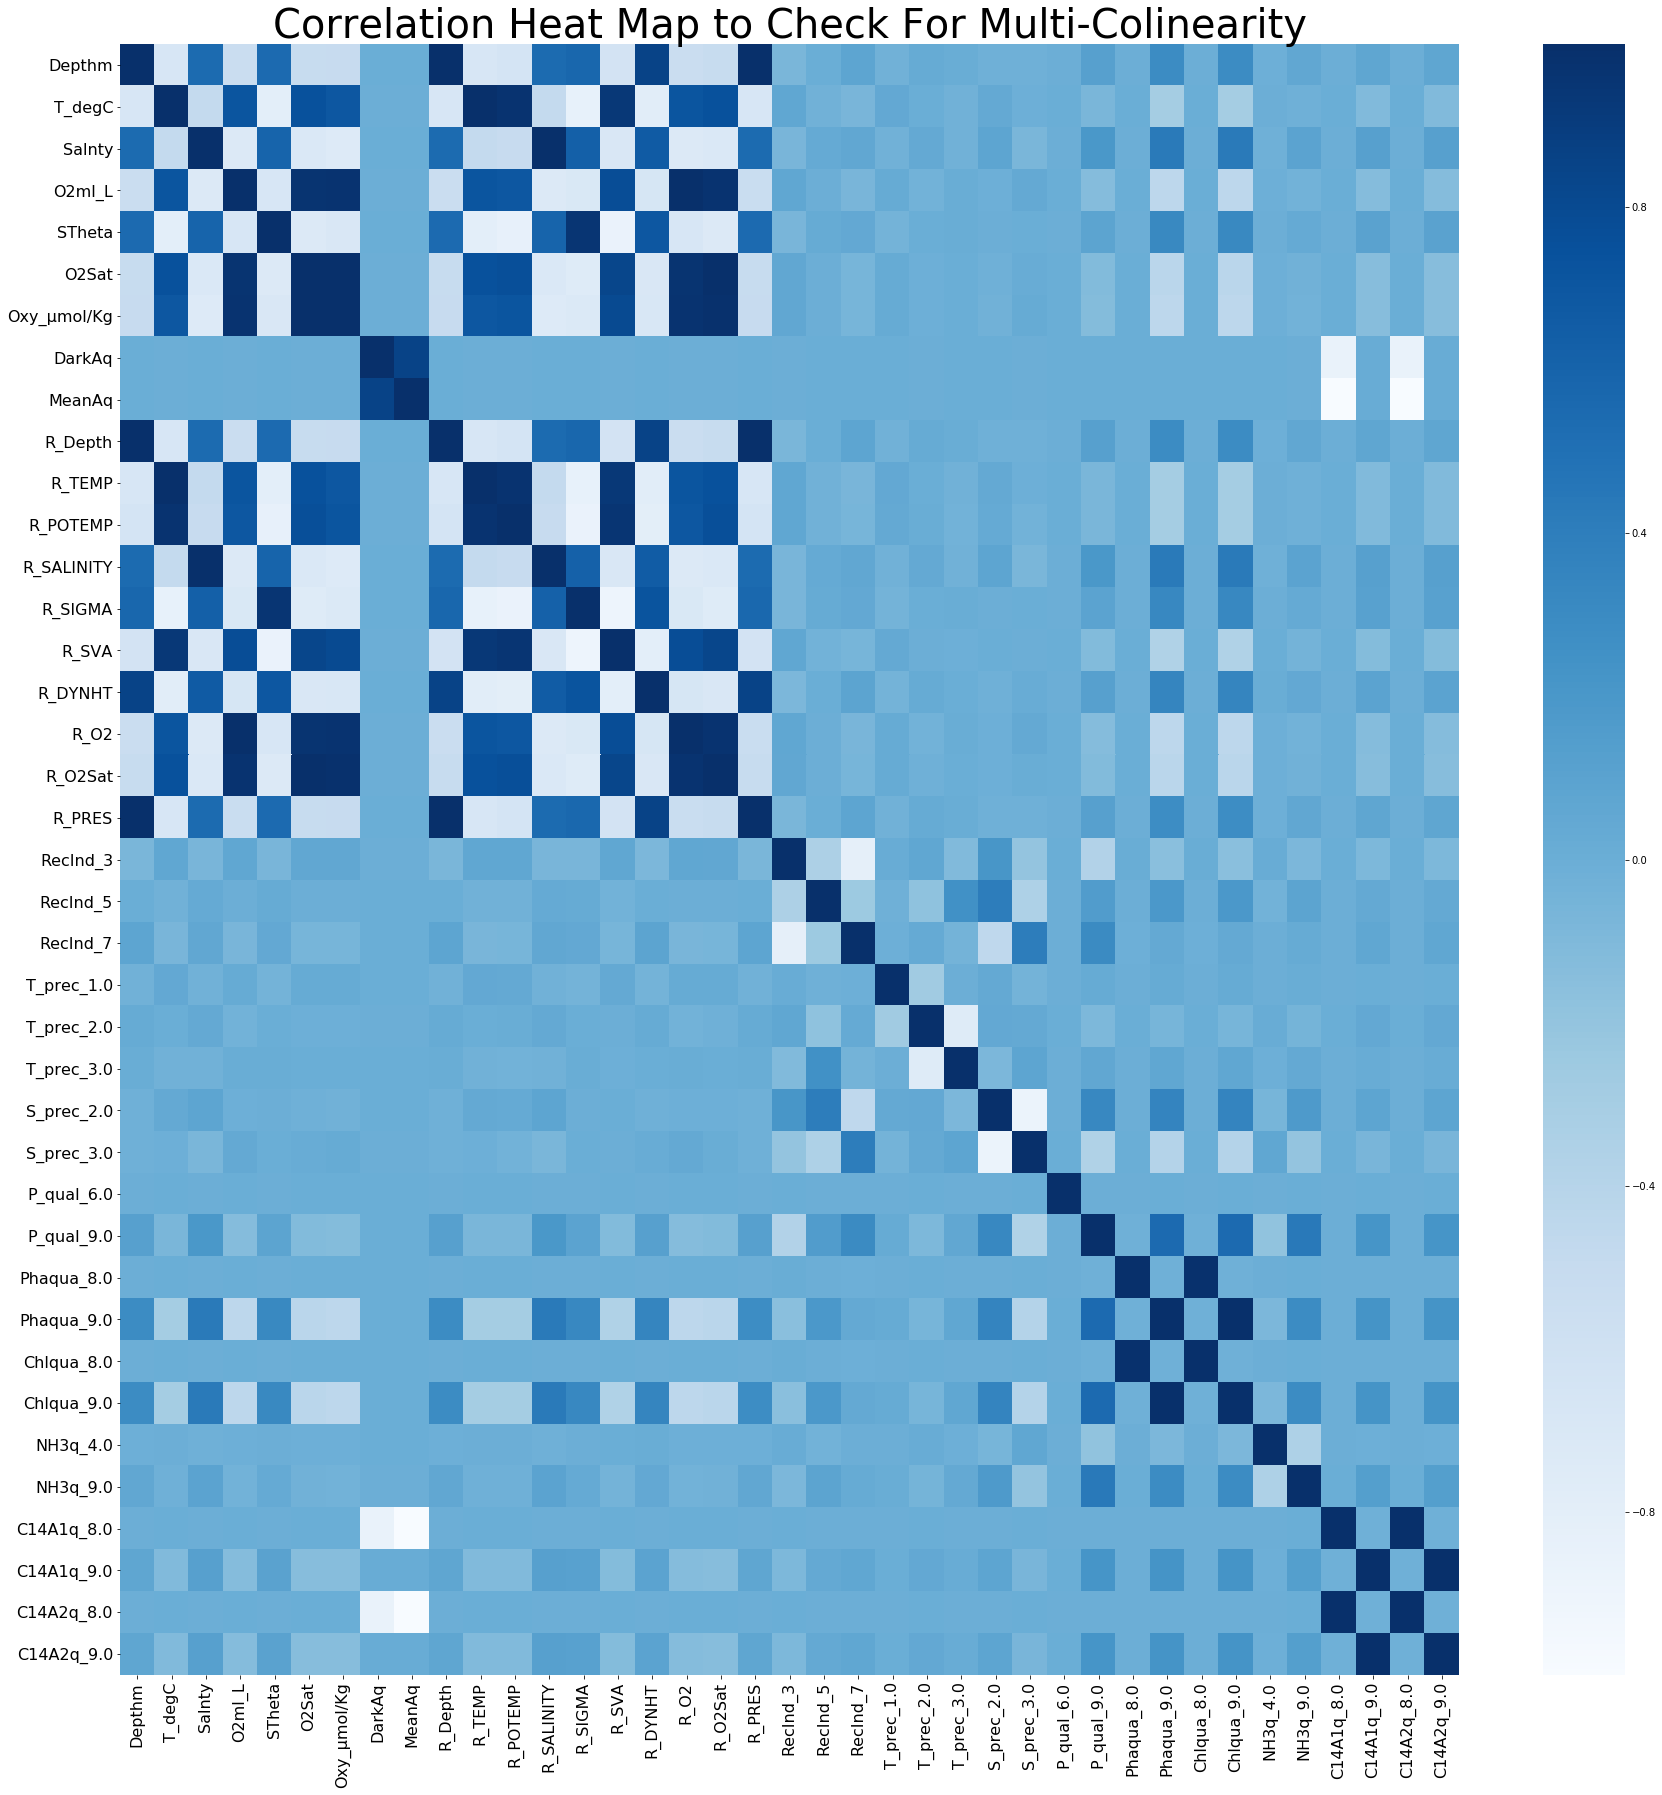

In [13]:


fig, ax = plt.subplots(figsize=(30,30)) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Correlation Heat Map to Check For Multi-Colinearity", fontsize=40)
sns.heatmap(df_with_dummies.corr(), vmin=-1, cmap='Blues')

From our the correlation matrix we can see that variables 'R_TEMP', 'R_POTEMP','R_SVA', and 'R_SALINITY' have very high correlations of over 0.9 with our variables of interest 'Salnty' and 'T_degC'. So to avoid violating the assumption of lack of multi colinearity we need to drop these variables from our data. Note, though there may be other variables with high correlation amongst themselves, as long as they do not have high correlation with our variables of interest we do not need to remove them.

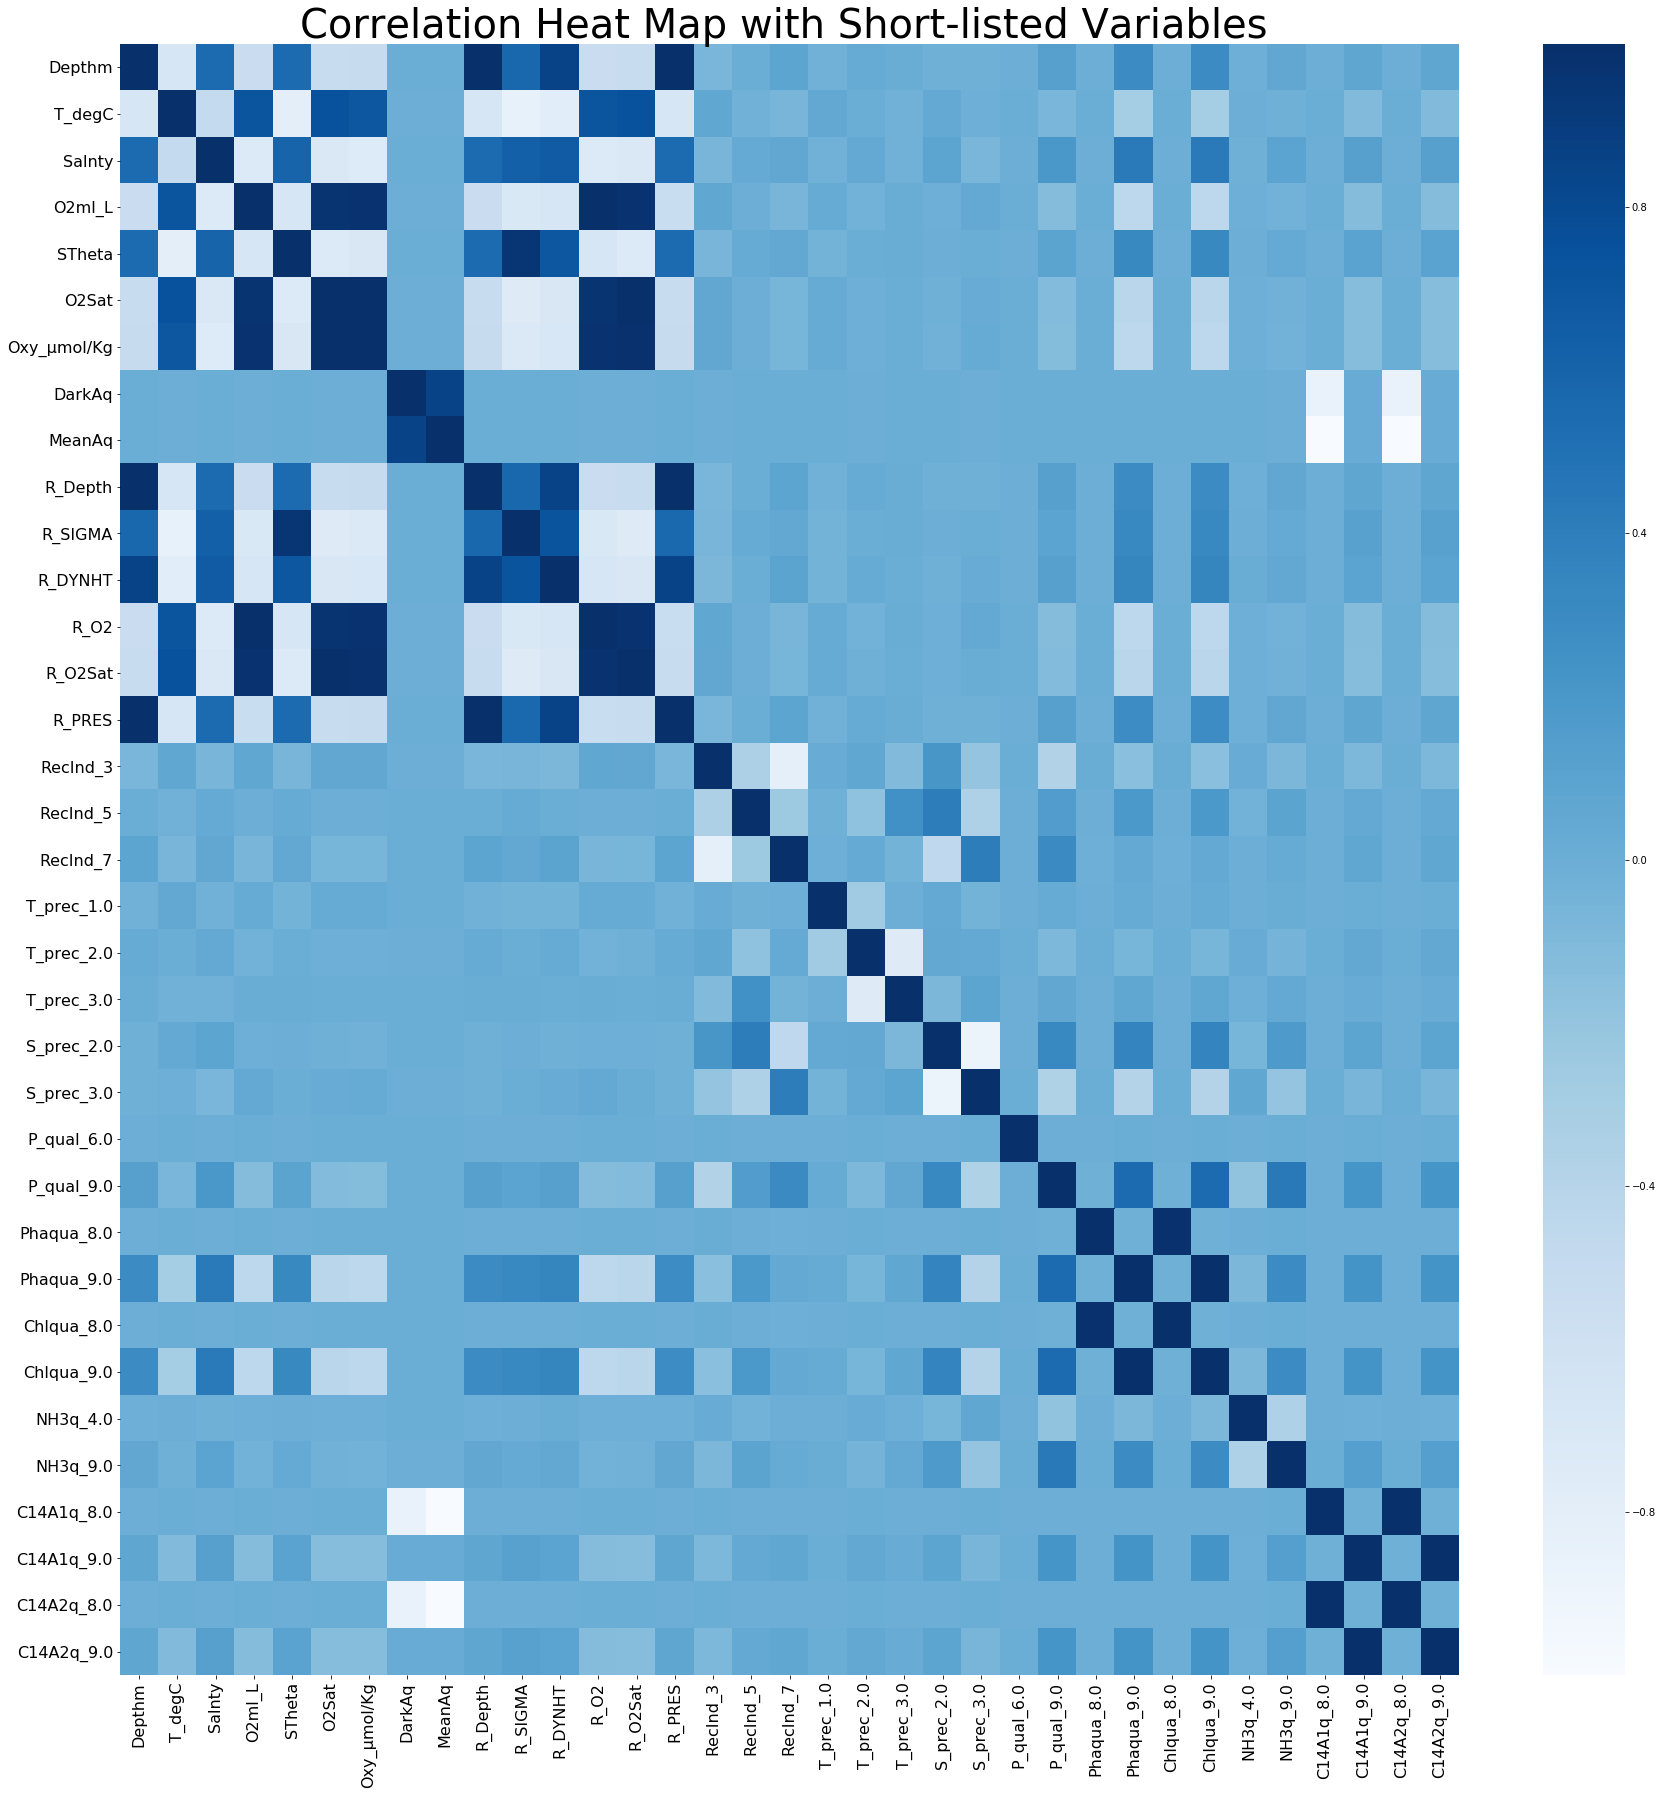

In [14]:
df_with_dummies = df_with_dummies.drop(columns=['R_TEMP', 'R_POTEMP','R_SVA','R_SALINITY'], axis=1)
fig, ax = plt.subplots(figsize=(30,30))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.title("Correlation Heat Map with Short-listed Variables ", fontsize=40)
sns.heatmap(df_with_dummies.corr(), vmin=-1, cmap='Blues' )

In [15]:
#for i in df_with_dummies.columns:
#    print(i)

# Model Creation and Visualization:

### We will now create a multi and simple linear model with some of the variables that were deemed of interest based on their correlation values or their description in the dataset.

In [16]:
#fit = ols('T_degC ~ C(RecInd_3) + C(RecInd_5) + C(RecInd_7)  + Depthm + Salnty + O2ml_L + STheta + O2Sat + MeanAq + R_Depth + R_SIGMA + R_DYNHT + R_O2 + R_O2Sat + R_PRES', data=df_with_dummies).fit()
#fit.summary()

In [17]:
target='T_degC'
features =['Depthm', 'Salnty','O2ml_L', 'STheta','O2Sat', 'MeanAq','RecInd_3','RecInd_5','RecInd_7','Oxy_µmol/Kg','R_Depth', 'R_SIGMA', 'R_DYNHT', 'R_O2', 'R_O2Sat']


In [18]:
x=df_with_dummies[features].sample(frac=0.005, random_state=123)
y=df_with_dummies[target].sample(frac=0.005, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
clf = LinearRegression()
clf.fit(x_train, y_train)
class_rate = clf.score(x_test, y_test)
y_pred = clf.predict(x_test).tolist()
print(class_rate*100)
y_test =y_test.values.tolist()

97.57001357633801


In [19]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual Temperature']
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Predicted Temperature']
multi_reg = pd.concat([y_test['Actual Temperature'], y_pred['Predicted Temperature']], axis=1, keys=['Actual Temperature', 'Predicted Temperature'])
multi_reg[:3]


,Actual Temperature,Predicted Temperature
0,11.50,11.336772
1,16.38,16.182249
2,14.22,14.093677


In [20]:
#sns.lmplot(x='Actual Temperature', y='Predicted Temperature', data=multi_reg)
#sns.lmplot(x='Salnty',y='T_degC', data=df_with_dummies, order=2, ci=None)

In [21]:
X = np.array(df_with_dummies['Salnty'].sample(frac=0.005, random_state=123)).reshape(-1, 1)
Y = np.array(df_with_dummies['T_degC'].sample(frac=0.005, random_state=123)).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clfs = LinearRegression()
clfs.fit(X_train, Y_train)
accuracy = clfs.score(X_test, Y_test)
print(accuracy*100)


Y_test =Y_test.tolist()

Y_test = pd.DataFrame(Y_test)
Y_test.columns = ['Actual Temperature']
Y_test[:]
Y_pred = clfs.predict(X_test).tolist()
Y_pred = pd.DataFrame(Y_pred)
Y_pred.columns = ['Predicted Temperature']
simple_reg = pd.concat([Y_test['Actual Temperature'], Y_pred['Predicted Temperature']], axis=1, keys=['Actual Temperature', 'Predicted Temperature'])
simple_reg[:3]


16.190990186179544


,Actual Temperature,Predicted Temperature
0,4.340,8.017663
1,15.413,14.419612
2,6.310,9.837996


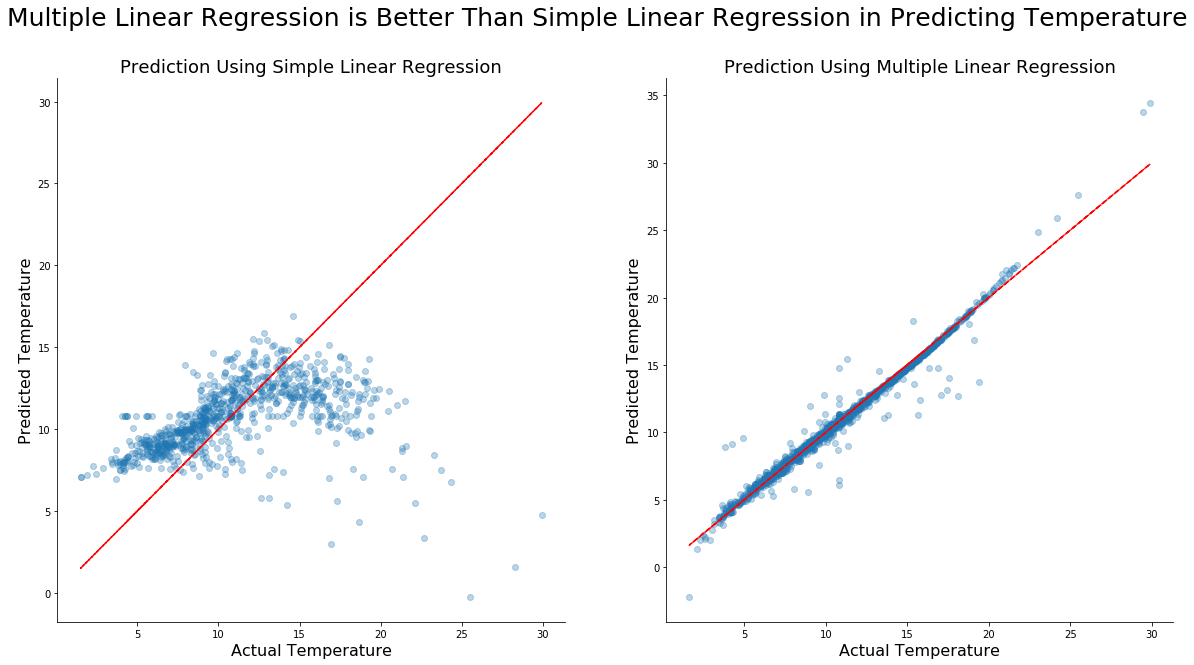

In [22]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Multiple Linear Regression is Better Than Simple Linear Regression in Predicting Temperature', fontsize=25)
plt.subplot(1,2,1)
plt.scatter(x=simple_reg['Actual Temperature'], y=simple_reg['Predicted Temperature'], alpha=0.3)
plt.title("Prediction Using Simple Linear Regression", fontsize=18)
plt.plot(simple_reg['Actual Temperature'],simple_reg['Actual Temperature'], ls='--', color='r')
plt.xlabel("Actual Temperature", fontsize=16)
plt.ylabel('Predicted Temperature', fontsize=16)
sns.despine(left=False, bottom=False)

plt.subplot(1,2,2)
plt.scatter(x=multi_reg['Actual Temperature'], y=multi_reg['Predicted Temperature'], alpha=0.3)
plt.title("Prediction Using Multiple Linear Regression", fontsize=18)
plt.plot(multi_reg['Actual Temperature'],multi_reg['Actual Temperature'], ls='--',color='r')
plt.xlabel("Actual Temperature", fontsize=16)
plt.ylabel('Predicted Temperature', fontsize=16)
sns.despine(left=False, bottom=False)

plt.show()

In [23]:

mlr_rate = class_rate*100
sl_rate = accuracy*100
rates = pd.DataFrame(columns=['MLR', 'SLR'])
rates.MLR = [mlr_rate]
rates.SLR = [sl_rate]


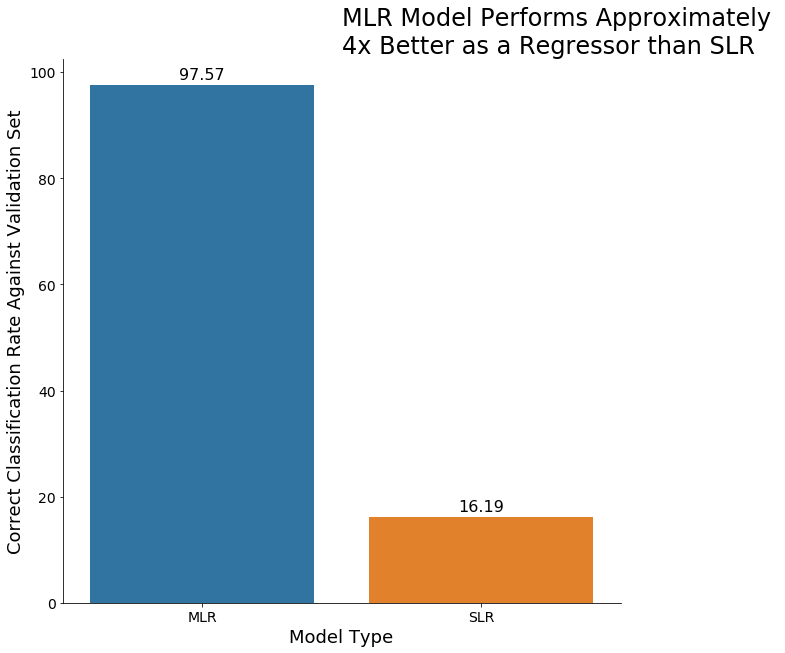

In [24]:
fig = plt.figure(figsize=(10,10))

g = sns.barplot(data=rates)
plt.ylabel('Correct Classification Rate Against Validation Set', fontsize=18)
plt.xlabel('Model Type', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
sns.despine(left=False, bottom=False)
for p in g.patches:
 g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha ='center',va='center', xytext=(0, 10), fontsize=16, textcoords='offset points')



plt.title("MLR Model Performs Approximately \n4x Better as a Regressor than SLR", fontsize=24, loc='center',horizontalalignment='left')

plt.show()